In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
path = "testcase-5-rev.dot"
nx_graph = nx.drawing.nx_pydot.read_dot(path)

In [18]:
print(nx_graph.nodes.get("a1"))
print(nx_graph.nodes.get("p1"))
print(nx_graph.in_edges("a1"))
print(nx_graph.get_edge_data('t1', 'a1'))

{'cost': '10', 'type': 'action'}
{'type': 'parallel'}
[('t1', 'a1')]
{0: {'range': '0..4'}}


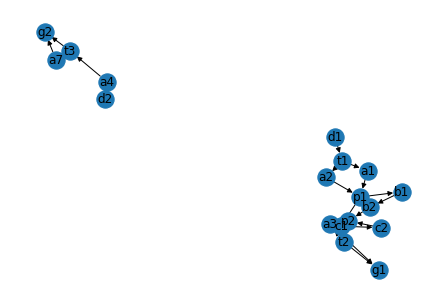

In [19]:
nx.draw(nx_graph, with_labels=True)
plt.show()

In [67]:
from graphviz import Digraph # We only need Digraph

class DotGraphCreator:
    __FORMAT = {
        'context': {
            'shape': 'oval',
            'fillcolor': 'grey',
            'fontcolor': 'black'
        },
        'action': {
            'shape': 'box',
            'fillcolor': 'deepskyblue',
            'fontcolor': 'black'
        },
        'decision': {
            'shape': 'diamond',
            'fillcolor': 'darkorange',
            'fontcolor': 'black'
        },
        'goal': {
            'shape': 'circle',
            'fillcolor': 'forestgreen',
            'fontcolor': 'white',
            'width': 0.1,
            'fontsize': 8
        },
        'parallel': {
            'shape': 'hexagon',
            'fillcolor': 'gold',
            'fontcolor': 'black',
            'height': 0.3,
            'width': 0.3,
            'fixedsize': True
        },
    }

    @classmethod
    def __create_node_label(cls, id, node_props):
        extra_label = f"<br/>[cost={node_props['cost']}]" if node_props['type'] == 'action' else ""
        return f"<<b>{id}</b>{extra_label}>"

    @classmethod
    def __create_edge_label(cls, in_node_props, edge_props):
        return f"{in_node_props['dataItem']}={edge_props['range']}" if in_node_props['type'] == 'decision' else ""

    @classmethod
    def create_dot_graph(cls, nx_graph):
        dot_graph = Digraph(name=nx_graph.graph['name'])
        for n in nx_graph.nodes:
            node_props = nx_graph.nodes[n]
            node_format = cls.__FORMAT[node_props['type']]
            dot_graph.node(
                n,
                label=cls.__create_node_label(n, node_props),
                style='filled',
                shape=node_format['shape'],
                fillcolor=node_format['fillcolor'],
                fontcolor=node_format['fontcolor']
            )

            for e in nx_graph.out_edges(n):
                edge_props = nx_graph[e[0]][e[1]][0]
                dot_graph.edge(
                    e[0], e[1],
                    label=cls.__create_edge_label(node_props, edge_props)
                )
        return dot_graph

In [68]:
dot_graph = DotGraphCreator.create_dot_graph(nx_graph)

In [69]:
dot_graph.view()

'test_5.gv.pdf'